# Fourier transform

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Five Cosines

We generate five [cosine tones](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html) with the following parameters:

|       | Amplitude | Frequency/Hz | Phase/Degree |
|-------|-----------|-------------:|-------------:|
| $x_1$ | 1.0       |     200      |       0      |
| $x_2$ | 0.75      |     400      |       0      |
| $x_3$ | 0.5       |     600      |      90      |
| $x_4$ | 0.25      |     800      |      90      |
| $x_5$ | 0.125     |    1000      |     -90      |

All five signals will have a duration of 1 second and a sampling rate of 44.1 kHz.

In [2]:
amplitudes = 1, 0.75, 0.5, 0.25, 0.125
frequencies = 200, 400, 600, 800, 1000  # Hz
phaseshifts = 0, 0, 90, 90, -90  # degree
duration = 1  # second
fs = 44100  # Hz

# parameters as row vectors
amplitudes = np.asarray(amplitudes).reshape(1, -1)
frequencies = np.asarray(frequencies).reshape(1, -1)
phaseshifts = np.asarray(phaseshifts).reshape(1, -1)

# time values as column vector
t = (np.arange(np.ceil(duration * fs)) / fs).reshape(-1, 1)

cosines = amplitudes * np.cos(2 * np.pi * frequencies * t + np.deg2rad(phaseshifts))
x1, x2, x3, x4, x5 = cosines.T

We now generate the sum signal $x_6 = x_1 + x_2 + x_3 + x_4 + x_5$ and plot the signals.

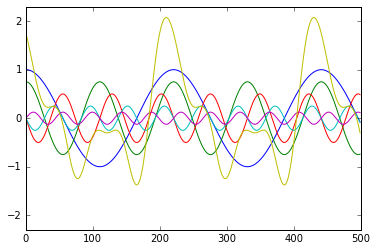

In [3]:
x6 = np.sum(cosines, axis=1)
six_signals = np.column_stack((cosines, x6))
plt.plot(six_signals[:500])
plt.ylim(-2.3, 2.3);

When playing back with a sound card or when writing to a sound file, the values are automatically clipped to a range from -1 to 1, leading to heavy distortions for signals that exceed this range:

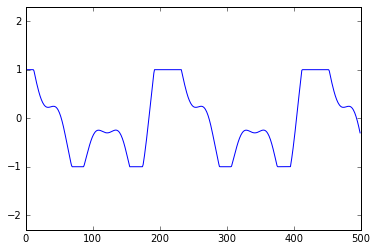

In [4]:
plt.plot(np.clip(x6[:500], -1, 1))
plt.ylim(-2.3, 2.3);

To avoid this clipping, we should scale the signal values to $\pm 1$ beforehand:

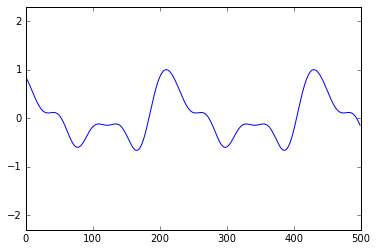

In [5]:
x6_norm = x6 / np.max(np.abs(x6))
plt.plot(x6_norm[:500])
plt.ylim(-2.3, 2.3);

## Naively implementing the Fourier transform

We now compare the function `naive_fourier_transform()`, that calculates the Fourier transform $X(\omega)$ of a one-dimensional array $x(t)$ using the equation

$$X(\omega) = \sum_{n=0}^{N-1} x(n) \text{e}^{-\text{i} \omega n/N},$$

where $N$ is the number of samples of $x$ and $\omega$ is the frequency with $0 \le \omega \lt N$.

In [6]:
def naive_fourier_transform(x):
    """Naive implementation of the Fourier transform.
    
    The input must be a one-dimensional array.
    WARNING: this implementation is extremely inefficient!
    
    """
    N = len(x)
    n = np.arange(N)
    return np.array([np.sum(x * np.exp(-1j * k * n / N))
                     for k in range(N)])

Complexity of naive implementation: $\mathcal{O}(N^2)$.

Now we call it with $x_1$.

In [9]:
%time X1_naive = naive_fourier_transform(x1[:5000])

CPU times: user 3.01 s, sys: 4 ms, total: 3.02 s
Wall time: 3.02 s


This can be done much faster with the Fast Fourier Transform (FFT).
Algorithmic complexity of FFT: $\mathcal{O}(N\log_2N)$.

In [10]:
%time X1_fft = np.fft.fft(x1[:5000])

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 697 µs


Try it yourself by using greater values than 5000 samples for the input signal. We go on and calculate the Fourier transform for all cosine signals.

In [12]:
cosine_spectra = np.fft.fft(cosines, axis=0)
X6 = np.fft.fft(x6)

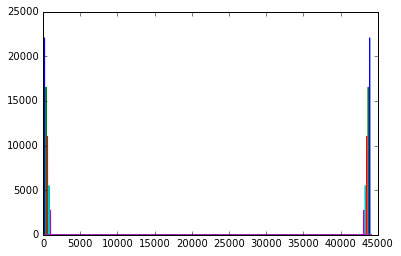

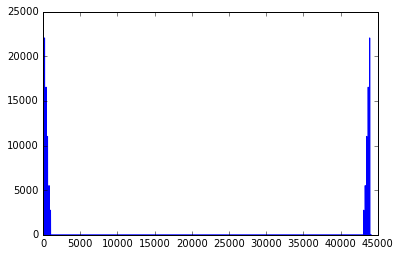

In [13]:
plt.plot(np.abs(cosine_spectra))
plt.figure()
plt.plot(np.abs(X6));

Now we have a closer look into the interesting frequency region.

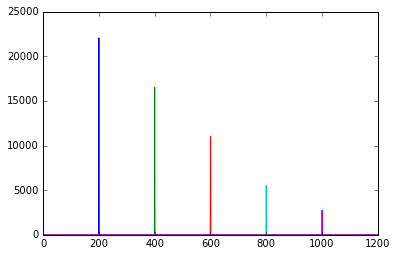

In [15]:
plt.plot(np.abs(cosine_spectra))
plt.xlim(0, 1200);

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>